In [1]:
# A quick Analysis of Airbnb Data from Seattle 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


'''See https://medium.com/@dkylemiller/the-number-one-thing-that-you-should-know-if-you-want-to-make-more-money-on-airbnb-6605070a4dca'''
'''for more commentary'''

'for more commentary'

In [2]:
data = pd.read_csv('C:/Users/dm12505/Desktop/hold/listings.csv')

In [3]:
def plot(values):
    '''This function plots the X values and leverages the dataframe structure to quickly provide a bar graph describing the data '''
    values.plot(kind ='bar')

In [4]:
"""Business Understanding

Airbnb is a technology company that has disputed the hotel industry by providing a platform for 
people to rent out their homes."""

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [5]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
"""Data Understanding

As a result, of proving a popular platform the company has access to a wealth of information about how people travel.
Some descriptive analysis was completed to better undersand the data, and to propose questions that if answered could 
be used to improve the business."""

data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [7]:
"""Preparing Data

Much of the data preparation included refromating the data, changing strings to ints/floats, 
and creating basic graphics to compare the data. One of Airbnb's primary challenges is to ensure
that their are enough reliable hosts offering rental services. They have classified their host 
as either Regular host or Superhost, based on the reviews that they receive this helps to ensure 
that people seeking to rent places receive an optimal experience. However, it wasn't clear if there
was any incentive for host to strive for a SuperHost designation.

The questions that are explored are:

1. Is it worthwhile to become a SuperHost?
2. What characterizes a Superhost
3. Are there things that one can do in order to become a Superhost?

"""

"Preparing Data\n\nMuch of the data preparation included refromating the data, changing strings to ints/floats, \nand creating basic graphics to compare the data. One of Airbnb's primary challenges is to ensure\nthat their are enough reliable hosts offering rental services. They have classified their host \nas either Regular host or Superhost, based on the reviews that they receive this helps to ensure \nthat people seeking to rent places receive an optimal experience. However, it wasn't clear if there\nwas any incentive for host to strive for a SuperHost designation.\n\nThe questions that are explored are:\n\n1. Is it worthwhile to become a SuperHost?\n2. What characterizes a Superhost\n3. Are there things that one can do in order to become a Superhost?\n\n"

In [8]:
# data modifications by column

data['host_is_superhost'].replace('t','SuperHost',inplace = True) 
data['host_is_superhost'].replace('f','Regular Host',inplace =True)


In [9]:
data['price'] = data['price'].str.replace('$','')
data['price'] = data['price'].str.replace(',','').astype('float64')


In [10]:
data['weekly_price'] = data['weekly_price'].str.replace('$','')
data['weekly_price'] = data['weekly_price'].str.replace(',','').astype('float64')

data['monthly_price'] = data['monthly_price'].str.replace('$','')
data['monthly_price'] = data['monthly_price'].str.replace(',','').astype('float64')

In [11]:
data['cleaning_fee'] = data['cleaning_fee'].str.replace('$','')
data['cleaning_fee'] = data['cleaning_fee'].str.replace(',','').astype('float64')


In [12]:
data['host_response_rate'] = data['host_response_rate'].str.replace('%','').astype('float64')/100

In [13]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%','').astype('float64')/100

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [15]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [16]:
super_data1 = data[['host_is_superhost', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
        'price', 'cleaning_fee', 'guests_included',
       'minimum_nights', 'maximum_nights','weekly_price', 'monthly_price', 'availability_365']]

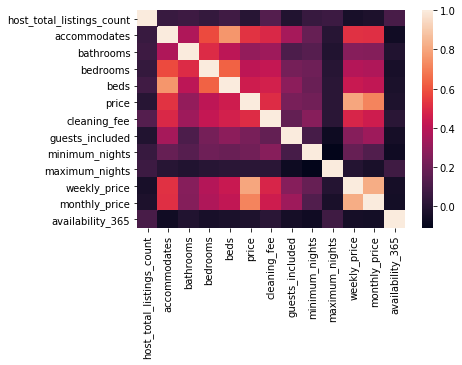

In [17]:
sns.heatmap(super_data1.corr(method='kendall'))

In [18]:
super_data1.groupby('host_is_superhost',axis =0).mean()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,weekly_price,monthly_price,availability_365
host_is_superhost,,,,,,,,,,,,,
Regular Host,7.740948,3.353193,1.260754,1.321240,1.749424,127.391376,62.756682,1.632982,2.417709,812.601382,777.660426,2495.468696,245.831468
SuperHost,4.880463,3.338046,1.255141,1.257069,1.682519,130.140103,58.092382,1.829049,2.182519,655.434447,824.320961,2980.989071,241.149100


In [19]:
host_table = pd.DataFrame(data= super_data1.groupby('host_is_superhost',axis =0).mean())

host_table.loc['Delta'] = host_table.loc['Regular Host'] - host_table.loc['SuperHost']

host_table.drop(['accommodates', 'guests_included', 'minimum_nights', 'maximum_nights'], axis = 1, inplace = True)

In [20]:
host_table.head()

,host_total_listings_count,bathrooms,bedrooms,beds,price,cleaning_fee,weekly_price,monthly_price,availability_365
host_is_superhost,,,,,,,,,
Regular Host,7.740948,1.260754,1.321240,1.749424,127.391376,62.756682,777.660426,2495.468696,245.831468
SuperHost,4.880463,1.255141,1.257069,1.682519,130.140103,58.092382,824.320961,2980.989071,241.149100
Delta,2.860485,0.005613,0.064171,0.066904,-2.748727,4.664300,-46.660535,-485.520375,4.682368


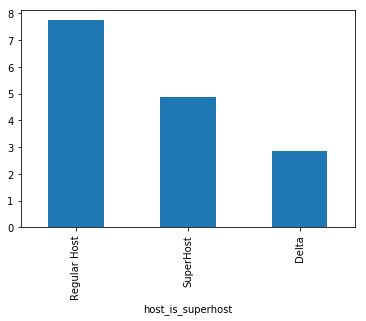

In [21]:
plot(host_table['host_total_listings_count'])

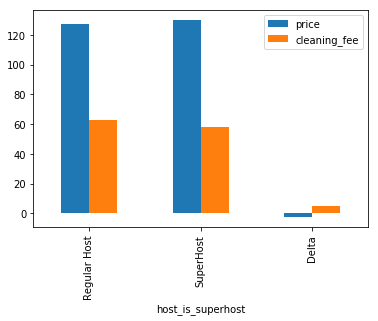

In [22]:
plot(host_table[['price', 'cleaning_fee']])

In [23]:
super_data1.groupby(['bedrooms','host_is_superhost'],axis =0).mean()

host_total_listings_count  accommodates  \
bedrooms host_is_superhost                                            
0.0      Regular Host                        5.440273      2.477816   
         SuperHost                           2.512821      2.589744   
1.0      Regular Host                        5.060654      2.470464   
         SuperHost                           4.915385      2.484615   
2.0      Regular Host                       18.017143      4.819048   
         SuperHost                           6.895652      5.000000   
3.0      Regular Host                       10.150628      6.393305   
         SuperHost                           2.818182      7.090909   
4.0      Regular Host                        2.206897      8.172414   
         SuperHost                           3.000000      8.818182   
5.0      Regular Host                        2.437500      9.562500   
         SuperHost                          11.500000     12.125000   
6.0      Regular Host                        3.250000     14.500000   
         SuperHost                           1.500000     11.000000   
7.0      Regular Host                        2.000000     16.000000   

                            bathrooms       beds       price  cleaning_fee  \
bedrooms host_is_superhost                                                   
0.0      Regular Host        0.993174   1.259386  101.890785     44.591549   
         SuperHost           1.000000   1.269231  109.833333     47.516129   
1.0      Regular Host        1.096389   1.275989   94.325422     42.573061   
         SuperHost           1.102885   1.221154  100.444231     40.873385   
2.0      Regular Host        1.422414   2.476190  170.451429     84.538117   
         SuperHost           1.404348   2.547826  190.547826     80.632075   
3.0      Regular Host        2.031381   3.435146  248.945607    121.558685   
         SuperHost           2.284091   3.545455  252.704545    109.073171   
4.0      Regular Host        2.629310   4.568966  318.637931    135.333333   
         SuperHost           2.590909   4.909091  287.636364    144.090909   
5.0      Regular Host        3.250000   5.250000  473.062500    192.307692   
         SuperHost           3.437500   7.375000  376.875000    243.750000   
6.0      Regular Host        3.000000   9.750000  557.250000    262.500000   
         SuperHost           3.500000   6.500000  620.000000    262.500000   
7.0      Regular Host        4.000000  10.000000  375.000000    300.000000   

                            guests_included  minimum_nights  maximum_nights  \
bedrooms host_is_superhost                                                    
0.0      Regular Host              1.283276        1.733788      805.225256   
         SuperHost                 1.448718        1.782051      515.794872   
1.0      Regular Host              1.320675        2.457806      840.977848   
         SuperHost                 1.501923        2.059615      655.630769   
2.0      Regular Host              2.057143        2.474286      767.702857   
         SuperHost                 2.330435        2.565217      721.234783   
3.0      Regular Host              2.748954        2.861925      735.841004   
         SuperHost                 4.068182        3.022727      620.750000   
4.0      Regular Host              3.965517        2.155172      768.844828   
         SuperHost                 4.545455        2.545455      758.454545   
5.0      Regular Host              4.187500        2.625000      687.812500   
         SuperHost                 2.250000        3.375000     1125.000000   
6.0      Regular Host              8.250000        3.750000      311.000000   
         SuperHost                 7.000000        2.500000      585.000000   
7.0      Regular Host              6.000000        4.000000       60.000000   

                            weekly_price  monthly_price  availability_365  
bedrooms host_is_superhost                                               

In [24]:
super_data1.groupby(['bedrooms','host_is_superhost'],axis =0).count()['host_total_listings_count']

bedrooms  host_is_superhost
0.0       Regular Host          293
          SuperHost              78
1.0       Regular Host         1896
          SuperHost             520
2.0       Regular Host          525
          SuperHost             115
3.0       Regular Host          239
          SuperHost              44
4.0       Regular Host           58
          SuperHost              11
5.0       Regular Host           16
          SuperHost               8
6.0       Regular Host            4
          SuperHost               2
7.0       Regular Host            1
Name: host_total_listings_count, dtype: int64

In [25]:
super_data2 = data[[ 'host_is_superhost','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value',
       'reviews_per_month']]

In [26]:
super_data2.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3814
Data columns (total 10 columns):
host_is_superhost              3158 non-null object
number_of_reviews              3158 non-null int64
review_scores_rating           3158 non-null float64
review_scores_accuracy         3158 non-null float64
review_scores_cleanliness      3158 non-null float64
review_scores_checkin          3158 non-null float64
review_scores_communication    3158 non-null float64
review_scores_location         3158 non-null float64
review_scores_value            3158 non-null float64
reviews_per_month              3158 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 271.4+ KB


In [27]:
super_data2.groupby('host_is_superhost',axis =0).mean()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
host_is_superhost,,,,,,,,,
Regular Host,17.235681,93.652893,9.552511,9.454018,9.731424,9.758278,9.564677,9.359602,1.804770
SuperHost,41.757069,97.395473,9.905459,9.885486,9.964048,9.974700,9.750999,9.749667,2.969627


In [28]:
review_table = pd.DataFrame(data = super_data2.groupby('host_is_superhost',axis =0).mean())

#review_table.drop(['review_scores_checkin', 'review_scores_value','review_scores_location' ,'review_scores_checkin', 'review_scores_accuracy'], axis =1)

review_table.head()


,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
host_is_superhost,,,,,,,,,
Regular Host,17.235681,93.652893,9.552511,9.454018,9.731424,9.758278,9.564677,9.359602,1.804770
SuperHost,41.757069,97.395473,9.905459,9.885486,9.964048,9.974700,9.750999,9.749667,2.969627


In [29]:
super_data2.groupby(['host_is_superhost','review_scores_rating'],axis =0).mean()

number_of_reviews  \
host_is_superhost review_scores_rating                      
Regular Host      20.0                           1.000000   
                  40.0                           1.750000   
                  53.0                           3.000000   
                  55.0                           4.000000   
                  57.0                           6.000000   
                  60.0                           1.727273   
                  64.0                           5.000000   
                  65.0                          12.000000   
                  66.0                           7.000000   
                  67.0                           4.000000   
                  68.0                          10.000000   
                  70.0                           3.750000   
                  71.0                           6.666667   
                  72.0                           8.250000   
                  73.0                           3.714286   
                  74.0                          17.500000   
                  75.0                           9.000000   
                  76.0                           8.200000   
                  77.0                          35.250000   
                  78.0                          18.250000   
                  79.0                          41.000000   
                  80.0                           3.605505   
                  81.0                          43.333333   
                  82.0                          33.000000   
                  83.0                          12.846154   
                  84.0                          26.863636   
                  85.0                          26.166667   
                  86.0                          29.823529   
                  87.0                          19.581818   
                  88.0                          25.347826   
                  89.0                          37.396226   
                  90.0                          14.221374   
                  91.0                          36.255319   
                  92.0                          30.080000   
                  93.0                          30.205714   
                  94.0                          41.698225   
                  95.0                          38.509434   
                  96.0                          33.617486   
                  97.0                          26.095588   
                  98.0                          23.035398   
                  99.0                          28.375000   
                  100.0                          3.945820   
SuperHost         60.0                           2.000000   
                  80.0                           1.000000   
                  84.0                           9.000000   
                  88.0                           5.000000   
                  90.0                          11.142857   
                  91.0                          14.333333   
                  92.0                          27.000000   
                  93.0                          27.666667   
                  94.0                          35.137931   
                  95.0                          43.833333   
                  96.0                          47.642105   
                  97.0                          64.138462   
                  98.0                          51.586592   
                  99.0                          41.443396   
                  100.0                         17.407407   

                                        review_scores_accuracy  \
host_is_superhost review_scores_rating                           
Regular Host      20.0                                2.000000   
                  40.0                                6.750000   
                  53.0                                6.000000   
                  55.0                                7.000000   
                  57.0                      

In [30]:
review_table = pd.DataFrame(data=super_data2.groupby(['host_is_superhost','review_scores_rating'],axis =0).mean())

reg_host_ratings = pd.DataFrame(data =list(review_table.index.get_level_values(1)[:42]), columns =['Regular Host Ratings'])
super_host_ratings =pd.DataFrame(data =list(review_table.index.get_level_values(1)[42:]), columns =['SuperHost Ratings'])
                        
#print(reg_host_ratings)
#print(super_host_ratings)

reg_host_number = pd.DataFrame(data =list(review_table['number_of_reviews'][:42]), columns =['Number of Reviews'])
super_host_number = pd.DataFrame(data= list(review_table['number_of_reviews'][42:]),columns =['Number of Reviews'])



In [31]:
review_table.index

MultiIndex(levels=[['Regular Host', 'SuperHost'], [20.0, 40.0, 53.0, 55.0, 57.0, 60.0, 64.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 5, 21, 25, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]],
           names=['host_is_superhost', 'review_scores_rating'])

    SuperHost Ratings  Number of Reviews
0                60.0           2.000000
1                80.0           1.000000
2                84.0           9.000000
3                88.0           5.000000
4                90.0          11.142857
5                91.0          14.333333
6                92.0          27.000000
7                93.0          27.666667
8                94.0          35.137931
9                95.0          43.833333
10               96.0          47.642105
11               97.0          64.138462
12               98.0          51.586592
13               99.0          41.443396
14              100.0          17.407407


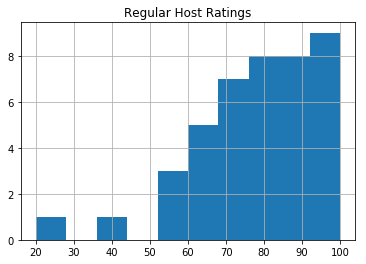

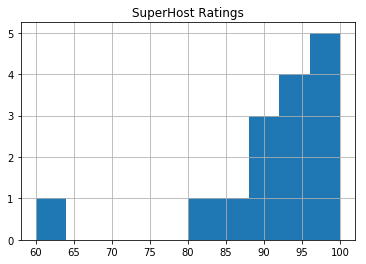

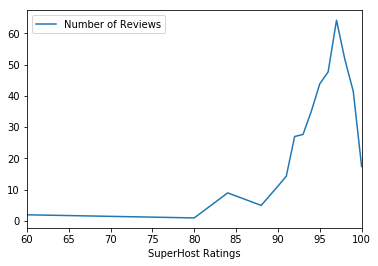

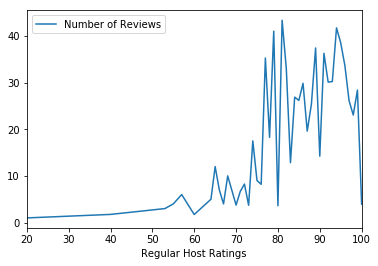

In [32]:
reg_table = pd.concat([reg_host_ratings, reg_host_number], axis =1)

super_table = pd.concat([super_host_ratings, super_host_number], axis =1)

print(super_table)
#print(reg_table)

reg_host_ratings.hist()
super_host_ratings.hist()

x= super_table['SuperHost Ratings']
X= reg_table['Regular Host Ratings']

super_host_number.plot(x)
reg_host_number.plot(X)

In [33]:

super_data3 = data[['host_response_time', 'host_response_rate', 
                    'host_is_superhost','cancellation_policy','instant_bookable', 'host_acceptance_rate']]

In [34]:
super_data3 = pd.DataFrame(data=super_data3)

In [35]:
super_data3.head()

,host_response_time,host_response_rate,host_is_superhost,cancellation_policy,instant_bookable,host_acceptance_rate
0,within a few hours,0.96,Regular Host,moderate,f,1.0
1,within an hour,0.98,SuperHost,strict,f,1.0
2,within a few hours,0.67,Regular Host,strict,f,1.0
3,NaN,NaN,Regular Host,flexible,f,NaN
4,within an hour,1.00,Regular Host,strict,f,NaN


In [36]:
super_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
host_response_time      3295 non-null object
host_response_rate      3295 non-null float64
host_is_superhost       3816 non-null object
cancellation_policy     3818 non-null object
instant_bookable        3818 non-null object
host_acceptance_rate    3045 non-null float64
dtypes: float64(2), object(4)
memory usage: 179.0+ KB


In [37]:
super_data3.dropna(subset=['host_acceptance_rate'], inplace=True)

In [38]:
super_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3814
Data columns (total 6 columns):
host_response_time      3027 non-null object
host_response_rate      3027 non-null float64
host_is_superhost       3045 non-null object
cancellation_policy     3045 non-null object
instant_bookable        3045 non-null object
host_acceptance_rate    3045 non-null float64
dtypes: float64(2), object(4)
memory usage: 166.5+ KB


In [39]:
# Number of Super Host 
super_data3['host_is_superhost'].value_counts()

Regular Host    2317
SuperHost        728
Name: host_is_superhost, dtype: int64

In [40]:
# Approx percentage of Superhost 

728/(728+3045)

0.19294990723562153

In [41]:
super_data3['cancellation_policy'].value_counts()

strict      1223
moderate    1024
flexible     798
Name: cancellation_policy, dtype: int64

In [42]:
response_speed = pd.DataFrame(data = super_data3.groupby(['host_response_time', 'host_is_superhost'],axis =0).count())

In [43]:
response_speed['host_response_rate']

host_response_time  host_is_superhost
a few days or more  Regular Host           31
                    SuperHost               1
within a day        Regular Host          438
                    SuperHost              52
within a few hours  Regular Host          699
                    SuperHost             190
within an hour      Regular Host         1134
                    SuperHost             482
Name: host_response_rate, dtype: int64

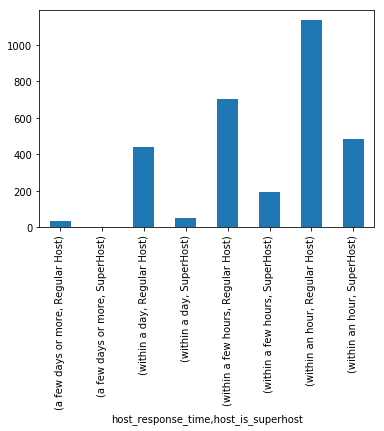

In [44]:
plot(response_speed['host_response_rate'])

In [45]:
cancel_policy = pd.DataFrame(data = super_data3.groupby(['cancellation_policy', 'host_is_superhost'],axis =0).count())

In [46]:
# Cancel policy counts

cancel_policy['host_response_rate']

cancellation_policy  host_is_superhost
flexible             Regular Host         662
                     SuperHost            129
moderate             Regular Host         737
                     SuperHost            281
strict               Regular Host         903
                     SuperHost            315
Name: host_response_rate, dtype: int64

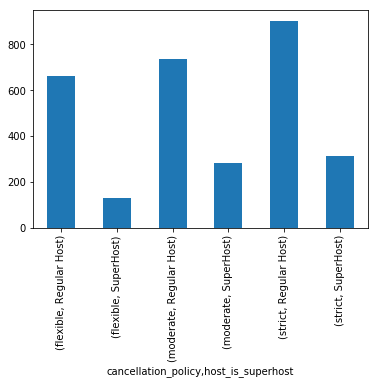

In [47]:
plot(cancel_policy['host_response_rate'])

In [48]:
instant_book = pd.DataFrame(data = super_data3.groupby(['instant_bookable', 'host_is_superhost'],axis =0).count())
instant_book['host_response_rate']

instant_bookable  host_is_superhost
f                 Regular Host         1927
                  SuperHost             562
t                 Regular Host          375
                  SuperHost             163
Name: host_response_rate, dtype: int64

In [49]:
super_data3[:5]

,host_response_time,host_response_rate,host_is_superhost,cancellation_policy,instant_bookable,host_acceptance_rate
0,within a few hours,0.96,Regular Host,moderate,f,1.0
1,within an hour,0.98,SuperHost,strict,f,1.0
2,within a few hours,0.67,Regular Host,strict,f,1.0
6,within an hour,1.00,SuperHost,moderate,f,1.0
7,within an hour,1.00,SuperHost,strict,f,1.0


In [50]:
super_data3[['host_is_superhost','host_response_rate','host_acceptance_rate']].groupby(['host_is_superhost'], axis =0).mean()

,host_response_rate,host_acceptance_rate
host_is_superhost,,
Regular Host,0.940039,0.999568
SuperHost,0.982428,1.000000


In [51]:
drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'amenities', 'square_feet', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'reviews_per_month']

In [52]:
model_data = data.drop(labels=drop, axis =1)

In [53]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 37 columns):
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_is_superhost                   3816 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
is_location_exact                   3818 non-null object
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                             

In [54]:
model_data['security_deposit'] = model_data['security_deposit'].str.replace('$', '')
model_data['security_deposit'] = model_data['security_deposit'].str.replace(',', '').astype('float64')

model_data['extra_people'] = model_data['extra_people'].str.replace('$', '')
model_data['extra_people'] = model_data['extra_people'].str.replace(',', '').astype('float64')

In [55]:
# missing data is assessed for each feature

model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 37 columns):
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_is_superhost                   3816 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
is_location_exact                   3818 non-null object
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                             

In [56]:
#Missing values are imputed with zero/ and or dropped to fit the model
# The dropna method used with the subset parameters was intended to ensure that all of the bedroom data was valid
#before any data was imputed.  It was important to maintain as much data possible without altering the characteristics
# of the bedroom feature.  From just comparative analysis(above), the bedroom feature was yielded many of the hypothesises this 
#analysis seeks to explore

model_data.dropna(subset =['bedrooms'], axis =0, inplace = True)

model_data.fillna(value =0, inplace=True)

model_data.drop(1297, inplace =True)
model_data.drop(1419, inplace =True)

model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3810 entries, 0 to 3817
Data columns (total 37 columns):
host_response_time                  3810 non-null object
host_response_rate                  3810 non-null float64
host_acceptance_rate                3810 non-null float64
host_is_superhost                   3810 non-null object
host_listings_count                 3810 non-null float64
host_total_listings_count           3810 non-null float64
host_verifications                  3810 non-null object
host_has_profile_pic                3810 non-null object
host_identity_verified              3810 non-null object
is_location_exact                   3810 non-null object
property_type                       3810 non-null object
room_type                           3810 non-null object
accommodates                        3810 non-null int64
bathrooms                           3810 non-null float64
bedrooms                            3810 non-null float64
beds                             

In [57]:
"""Data Modeling

A Logistic regression model was implemented to conduct feature analysis which revealed 
they types of feature that could be used to predict if a host was a SuperHost.
Airbnb explains that they use reviews to identify Superhost, because it is understand 
that the quality and number of customer reviews would affect a host's status that data 
was not included in the prediction model. However, analysis of the customer review data 
did show clear differnces amoung the two classes of host."""

"Data Modeling\n\nA Logistic regression model was implemented to conduct feature analysis which revealed \nthey types of feature that could be used to predict if a host was a SuperHost.\nAirbnb explains that they use reviews to identify Superhost, because it is understand \nthat the quality and number of customer reviews would affect a host's status that data \nwas not included in the prediction model. However, analysis of the customer review data \ndid show clear differnces amoung the two classes of host."

In [58]:
# Categorical dummy variables are added to feature-set for non-continous features

# the get dunmies automatically creates dunny variables for all of the relevant features to ensure that as much data can be
# as posssible initially
Y = model_data['host_is_superhost']

# these are the labels, this feature is being transformed here into classes.  Prior to this point those labels made some
# the descriptive tables easier to read, understand and continue the abalysis. Here they have to be converted from strings 
#to integers so that they can be used with the Logistic Model

Y = Y.str.replace('Regular Host','0')
Y = Y.str.replace('SuperHost','1')
Y = Y.astype('float64')

X = pd.get_dummies(model_data.drop(labels=['host_is_superhost'], axis =1))

X.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,has_availability_t,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,0.96,1.0,3.0,3.0,4,1.0,1.0,1.0,85.0,0.0,...,1,1,0,0,1,0,1,0,1,0
1,0.98,1.0,6.0,6.0,4,1.0,1.0,1.0,150.0,1000.0,...,1,1,0,0,0,1,0,1,0,1
2,0.67,1.0,2.0,2.0,11,4.5,5.0,7.0,975.0,0.0,...,1,1,0,0,0,1,1,0,1,0
3,0.00,0.0,1.0,1.0,3,1.0,0.0,2.0,100.0,650.0,...,1,1,0,1,0,0,1,0,1,0
4,1.00,0.0,2.0,2.0,6,2.0,3.0,3.0,450.0,0.0,...,1,1,0,0,0,1,1,0,1,0


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15, random_state=1)

from sklearn.linear_model import LogisticRegression

def build_model(c_param):
    
    model = LogisticRegression(C=c_param)
    
    return model

model = build_model(1.0)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
# build model function 
# allows more flexibility for building and comparing models

def build_model(c_param):
    
    model = LogisticRegression(C=c_param)
    
    return model

In [61]:
model = build_model(1.0)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
model.score(X_test, y_test)

0.7902097902097902

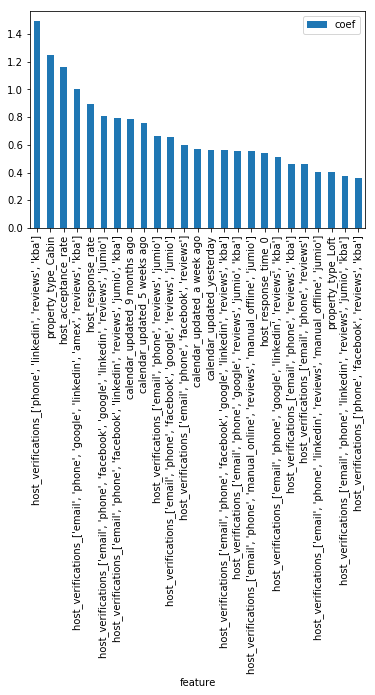

In [63]:
a = model.coef_.ravel()
b = X_train.columns

c = pd.DataFrame({'feature': b, 'coef': a})

c.sort_values(by = 'coef', ascending =False)[:25].plot(x='feature', y='coef', kind='bar')



In [64]:
"""Evaluate the Results

Results suggests that SuperUser are able to charge more an incur lower 
expenses for comprably sized rentals when compared to Non-superusers resulting
in higher profits."""

'Evaluate the Results\n\nResults suggests that SuperUser are able to charge more an incur lower \nexpenses for comprably sized rentals when compared to Non-superusers resulting\nin higher profits.'

In [65]:
features = c.sort_values(by = 'coef', ascending =False)[:12]

from IPython.display import HTML

HTML(features.to_html(index=False))

coef,feature
1.494106,"host_verifications_['phone', 'linkedin', 'revi..."
1.246154,property_type_Cabin
1.159969,host_acceptance_rate
1.006273,"host_verifications_['email', 'phone', 'google'..."
0.896820,host_response_rate
0.808996,"host_verifications_['email', 'phone', 'faceboo..."
0.790907,"host_verifications_['email', 'phone', 'faceboo..."
0.786182,calendar_updated_9 months ago
0.756437,calendar_updated_5 weeks ago
0.664735,"host_verifications_['email', 'phone', 'reviews..."


C:\Users\dm12505\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.26953990368122527


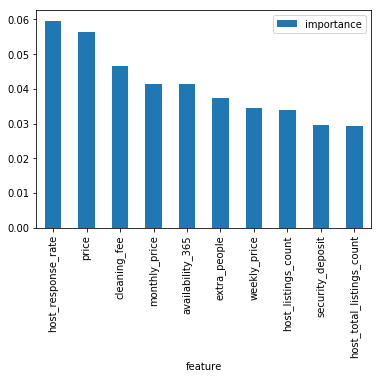

In [66]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(max_depth=20, random_state=0)
model_forest.fit(X_train, y_train)

print(model_forest.score(X_test, y_test))

model_forest_importances = model_forest.feature_importances_
model_forest_result = pd.DataFrame({'feature': X_train.columns, 'importance': model_forest_importances})
model_forest_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')